# Kaggle Titanic
## Logistic Regression with Python
### **THIS IS DESIGNED TO BE USED IN GOOGLE COLAB - IF USING JUPYTER, SEE V5 AND BEYOND**

For this lecture we will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous dataset.


**BL NOTE - END TO END SUPERVISED MACHINE LEARNING (FROM SLIDE)**

---
1.   Frame the problem
2.   Obtain Data
3.   Analyze Data
4.   Feature Engineering
5.   Model Selection
6.   Evaluation
7.   Predict on New Cases

# Step - 1 : Frame The Problem

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.



# Step - 2 : Obtain the Data

## Import Libraries

In [15]:
!pwd

/Users/Brian/Dropbox/Programming/Projects/Python, DS Proj/2019-01-19 Python for ML Bootcamp/Titanic


In [16]:
!pip install -q  missingno

You are using pip version 18.1, however version 19.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms
%matplotlib inline

In [18]:
!ls -l

total 848
-rw-r--r--@ 1 Brian  staff  130056 Jan 20 20:23 Kaggle Titanic submission results 2019-01-20.png
-rwxr-xr-x@ 1 Brian  staff   27286 Jan 19 22:51 Titanic (2019) v2.ipynb
-rwxr-xr-x@ 1 Brian  staff   27287 Jan 19 12:12 Titanic (2019).ipynb
-rw-r--r--@ 1 Brian  staff   32530 Jan 21 15:15 Titanic (2019-BL) v3.ipynb
-rw-r--r--@ 1 Brian  staff   49805 Jan 22 22:58 Titanic (2019-BL) v4.ipynb
-rw-r--r--@ 1 Brian  staff   28629 Jan 22 23:02 Titanic Data-Test.csv
-rw-r--r--@ 1 Brian  staff   61194 Jan 22 23:02 Titanic Data-Train.csv
-rw-r--r--@ 1 Brian  staff    2839 Jan 20 14:27 Titanic result v3 2019-01-20.csv
-rw-r--r--@ 1 Brian  staff    2839 Jan 21 14:03 Titanic result v4 2019-01-21.csv
-rw-r--r--@ 1 Brian  staff   60302 Jan 22 23:00 titanic.csv


Pandas provides two important data types with in built functions to be able to provide extensive capability to handle the data.The datatypes include Series and DataFrames.

Pandas provides ways to read or get the data from various sources like read_csv,read_excel,read_html etc.The data is read and stored in the form of DataFrames.

In [19]:
!wget https://www.dropbox.com/s/8grgwn4b6y25frw/titanic.csv

/bin/sh: wget: command not found


In [20]:
!ls -l

total 848
-rw-r--r--@ 1 Brian  staff  130056 Jan 20 20:23 Kaggle Titanic submission results 2019-01-20.png
-rwxr-xr-x@ 1 Brian  staff   27286 Jan 19 22:51 Titanic (2019) v2.ipynb
-rwxr-xr-x@ 1 Brian  staff   27287 Jan 19 12:12 Titanic (2019).ipynb
-rw-r--r--@ 1 Brian  staff   32530 Jan 21 15:15 Titanic (2019-BL) v3.ipynb
-rw-r--r--@ 1 Brian  staff   49805 Jan 22 22:58 Titanic (2019-BL) v4.ipynb
-rw-r--r--@ 1 Brian  staff   28629 Jan 22 23:02 Titanic Data-Test.csv
-rw-r--r--@ 1 Brian  staff   61194 Jan 22 23:02 Titanic Data-Train.csv
-rw-r--r--@ 1 Brian  staff    2839 Jan 20 14:27 Titanic result v3 2019-01-20.csv
-rw-r--r--@ 1 Brian  staff    2839 Jan 21 14:03 Titanic result v4 2019-01-21.csv
-rw-r--r--@ 1 Brian  staff   60302 Jan 22 23:00 titanic.csv


In [21]:
data = pd.read_csv('Titanic Data-Train.csv')

In [22]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
#to get the last 5 entries of the data
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [24]:
type(data)

pandas.core.frame.DataFrame

In [25]:
data.shape

(891, 12)

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [29]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Accessing individual data in the data frame

### Working with Columns

since each dataframe is a collection of series if we access a single column we get a series object

In [30]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
y = data[['Cabin','Parch']].head()

In [32]:
type(y)

pandas.core.frame.DataFrame

In [33]:
y.head()

,Cabin,Parch
0,NaN,0
1,C85,0
2,NaN,0
3,C123,0
4,NaN,0


In [34]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Step - 3 : Analyse the Data

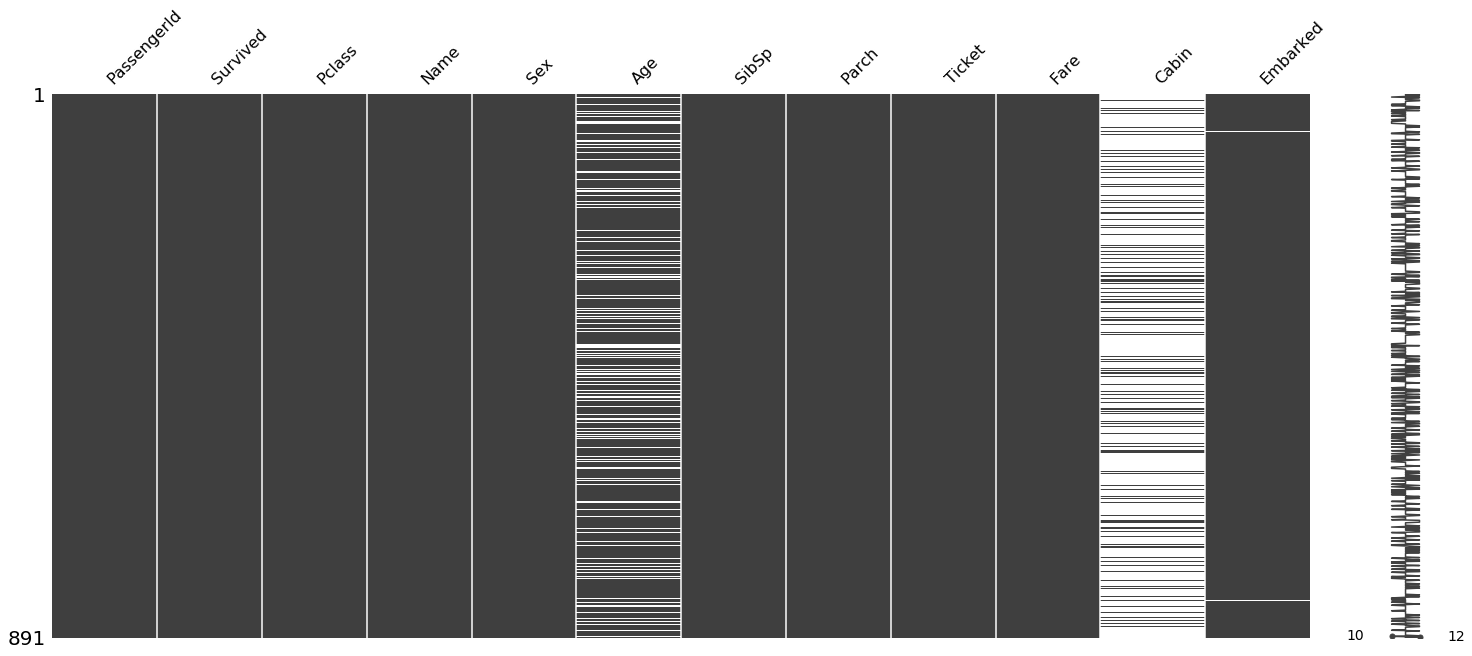

In [35]:
ms.matrix(data)

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


We can observe that there are missing values in 'Age', 'Cabin' and 'Embarked'. Let's continue.

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Visualization of data with Seaborn

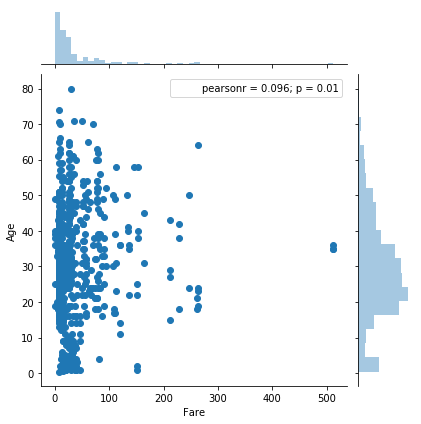

In [38]:
sns.jointplot(x='Fare',y='Age',data=data)

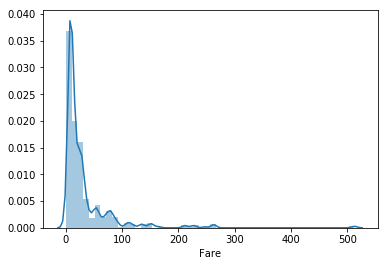

In [39]:
sns.distplot(data['Fare'])
#KDE?

In [40]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Text(0.5,1,'data.corr()')

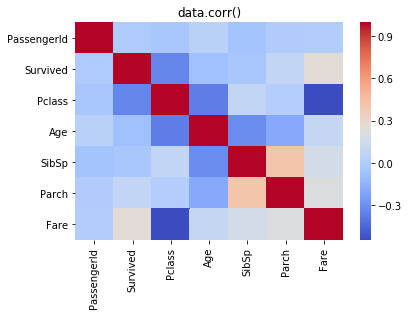

In [41]:
sns.heatmap(data.corr(),cmap='coolwarm')
plt.title('data.corr()')

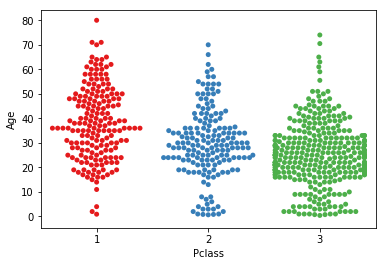

In [42]:
sns.swarmplot
sns.swarmplot(x='Pclass',y='Age',data=data,palette='Set1')

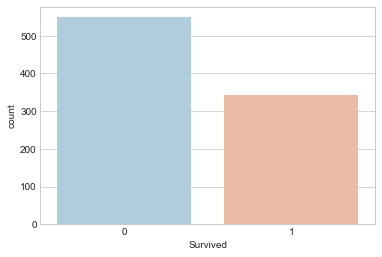

In [43]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',data=data,palette='RdBu_r')

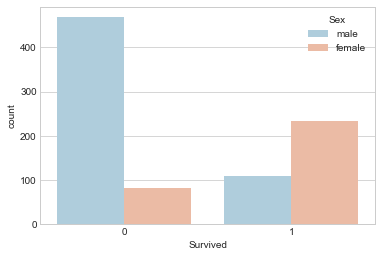

In [44]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=data,palette='RdBu_r')

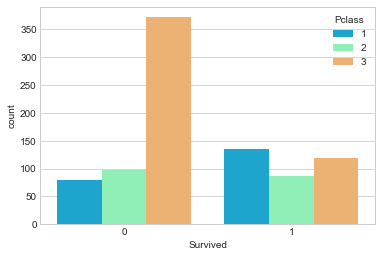

In [45]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data = data,palette='rainbow')

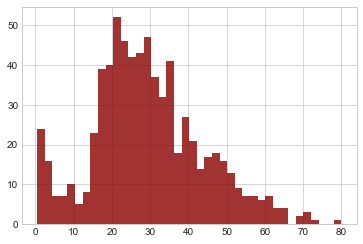

In [46]:
data['Age'].hist(bins = 40, color = 'darkred', alpha = 0.8)

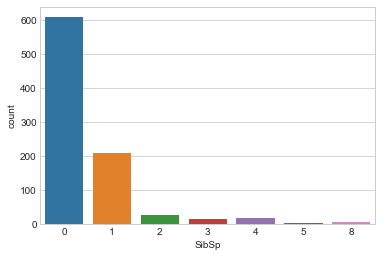

In [47]:
sns.countplot(x = 'SibSp', data = data)

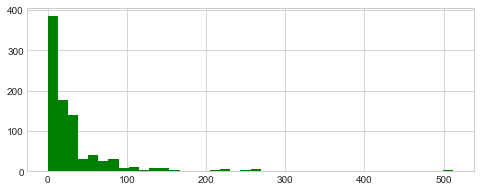

In [48]:
data['Fare'].hist(color = 'green', bins = 40, figsize = (8,3))

#### What do you observe from the above charts?

# Step - 4 : Feature Engineering

## Feature Engineering

We want to fill the missing values of the age in the dataset with the average age value for each of the classes. This is called data imputation.

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


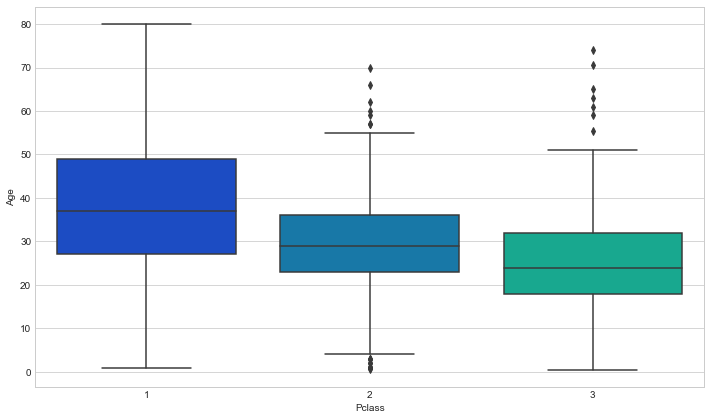

In [50]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=data,palette='winter')

In [51]:
# BL NOTE - Check the first 20 rows of age to see null values
data['Age'].head(20)

0     22.0
1     38.0
2     26.0
3     35.0
4     35.0
5      NaN
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17     NaN
18    31.0
19     NaN
Name: Age, dtype: float64

In [52]:
# BL NOTE - Check the values for each class
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [53]:
# BL NOTE - replace all null values within each class with the following
# Note that this function does not trigger the error: "A value is trying to be set on a copy of a slice from a DataFrame"
# That error is common on complex filtering like this and it took quite a while to work out a solution.
data.loc[(data['Age'].isnull() ) & (data['Pclass']==1), 'Age'] = int(data.loc[data['Pclass']==1]['Age'].mean())
data.loc[(data['Age'].isnull() ) & (data['Pclass']==2), 'Age'] = int(data.loc[data['Pclass']==2]['Age'].mean())
data.loc[(data['Age'].isnull() ) & (data['Pclass']==3), 'Age'] = int(data.loc[data['Pclass']==3]['Age'].mean())

In [54]:
# BL NOTE - Different checks to ensure nulls removed from Age
#data[data['Pclass']==1]
#data[data['Age']==np.nan] # does not work - need to use .isnull()
#data[data['Age'].isnull()]
#data[(data['Age'].isnull() ) & (data['Pclass']==1)]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


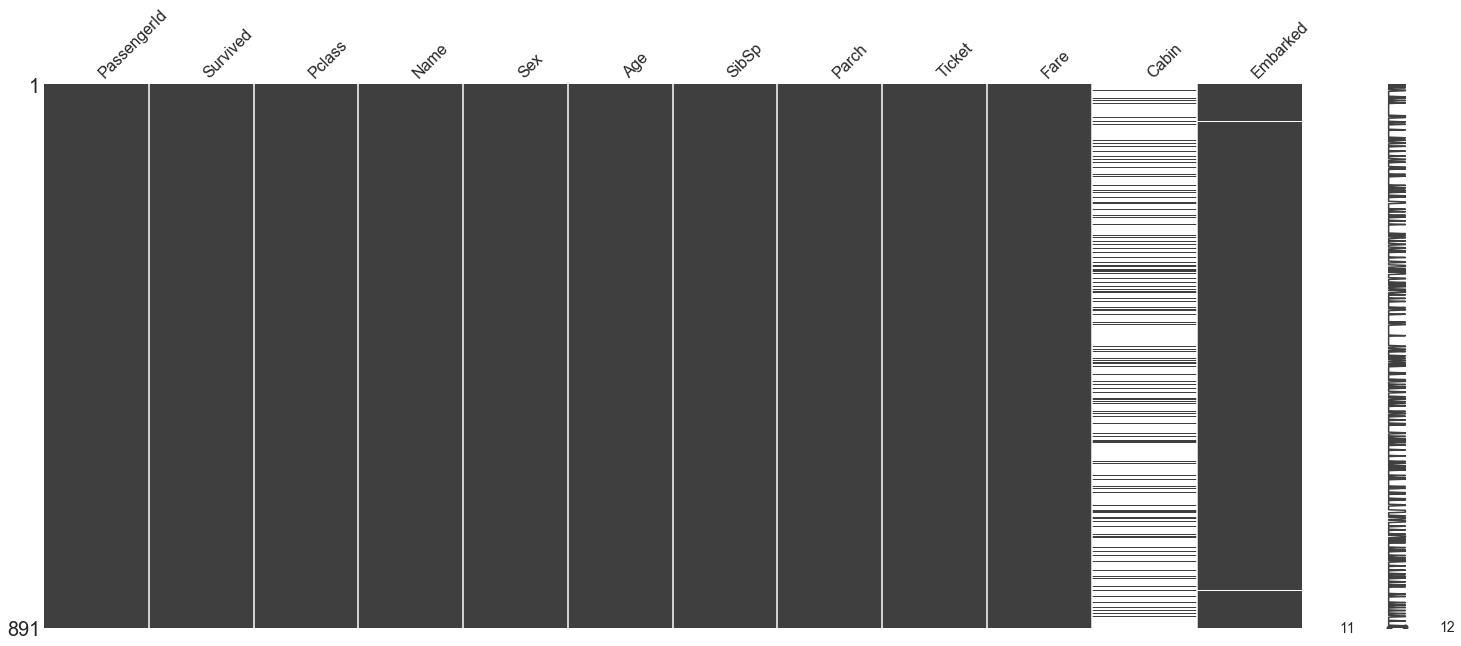

In [55]:
ms.matrix(data)

The Age column is imputed sucessfully.

Let's drop the Cabin column and the row in the Embarked that is NaN.

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [57]:
data.drop('Cabin',axis=1)
#does not affect the actual dataframe becasuse "inplace" not selected, OR data = data.drop('Cabin', axis=1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [59]:
data.drop('Cabin', axis = 1,inplace=True)

In [60]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [61]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [62]:
data.dropna(inplace = True)

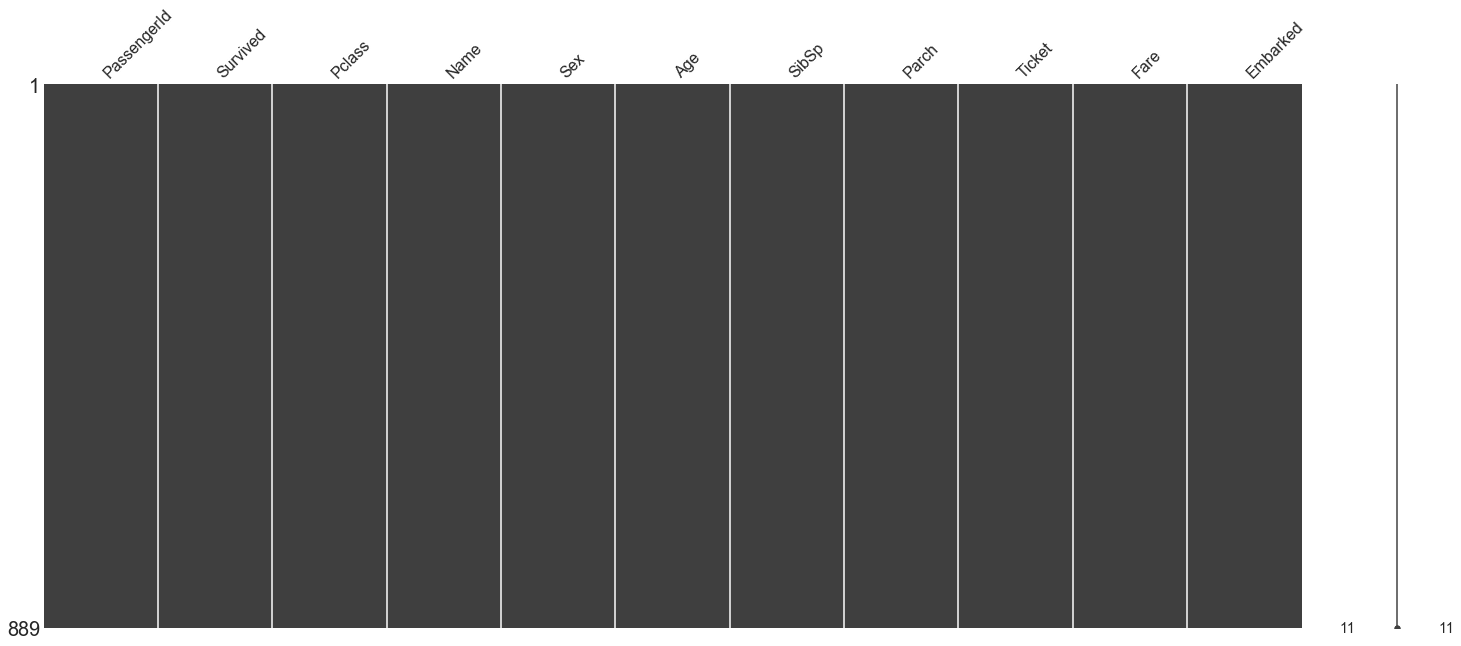

In [63]:
ms.matrix(data)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


## Converting Categorical Features 

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [65]:
data['Sex'].value_counts()

male      577
female    312
Name: Sex, dtype: int64

In [66]:
sex = pd.get_dummies(data['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [67]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [68]:
embark = pd.get_dummies(data['Embarked'],drop_first=True)
embark.head(10)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,0


In [69]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [70]:
old_data = data.copy()
data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
data.head()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [71]:
data = pd.concat([data,sex,embark],axis=1)

In [72]:
data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Fare           889 non-null float64
male           889 non-null uint8
Q              889 non-null uint8
S              889 non-null uint8
dtypes: float64(2), int64(5), uint8(3)
memory usage: 58.2 KB


In [74]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.206040,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.486260,0.834700,13.177747,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


# Step - 5 : Model Selection

## Building a Logistic Regression model

In [75]:
X = data.drop('Survived',axis=1)
y = data['Survived']

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X,y 
                                                    , test_size=0.15, 
                                                    random_state=42)

In [78]:
len(y_test)

134

In [79]:
# BL NOTE - using len of data instead of hard coded 889
len(data)

889

In [80]:
#178/889
# BL NOTE - using len of data instead of hard coded 889
len(y_test) / len(data)

0.15073115860517436

In [81]:
X.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,2.311586,29.206040,0.524184,0.382452,32.096681,0.649044,0.086614,0.724409
std,256.998173,0.834700,13.177747,1.103705,0.806761,49.697504,0.477538,0.281427,0.447063
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,224.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,446.000000,3.000000,26.000000,0.000000,0.000000,14.454200,1.000000,0.000000,1.000000
75%,668.000000,3.000000,36.500000,1.000000,0.000000,31.000000,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [82]:
X_train.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
count,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000,755.000000
mean,443.206623,2.315232,29.388967,0.552318,0.396026,32.145750,0.650331,0.091391,0.724503
std,257.443826,0.836006,13.446087,1.146256,0.829327,48.548195,0.477181,0.288355,0.447060
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000
50%,443.000000,3.000000,26.000000,0.000000,0.000000,14.500000,1.000000,0.000000,1.000000
75%,666.000000,3.000000,37.000000,1.000000,0.000000,31.275000,1.000000,0.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [83]:
y_train.describe()

count    755.000000
mean       0.388079
std        0.487636
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [84]:
from sklearn.linear_model import LogisticRegression

# Build the Model.
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train) # this is where training happens

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [85]:
logmodel.coef_

array([[  2.86006067e-04,  -8.59575347e-01,  -3.13824816e-02,
         -3.10075103e-01,  -6.87918922e-02,   4.45599166e-03,
         -2.41978842e+00,  -5.05394545e-02,  -2.40892298e-01]])

In [86]:
# BL NOTE - Get the feature weights, convert from multi-layer array to a list so they can be matched with corresponding feature names
weights = list(logmodel.coef_[0] )
weights

[0.00028600606706527645,
 -0.85957534661265389,
 -0.031382481564661703,
 -0.3100751028543699,
 -0.06879189219622768,
 0.0044559916620605204,
 -2.4197884237238201,
 -0.050539454528002195,
 -0.24089229785693314]

In [87]:
# BL NOTE - Get a list of the features
features = list(X_train.columns.values)
features

['PassengerId', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S']

In [88]:
# BL NOTE - Combine feature names with Weights
feat_weights = list(zip(weights, X_train.columns))

In [89]:
# BL NOTE - Print out the features and corresponding weights sorted by weighting
# BL NOTE - Using absolute value of the weights to get the most important features both positive and negative
feat_weights.sort(reverse=True, key=lambda w: abs(w[0]) )
feat_weights

[(-2.4197884237238201, 'male'),
 (-0.85957534661265389, 'Pclass'),
 (-0.3100751028543699, 'SibSp'),
 (-0.24089229785693314, 'S'),
 (-0.06879189219622768, 'Parch'),
 (-0.050539454528002195, 'Q'),
 (-0.031382481564661703, 'Age'),
 (0.0044559916620605204, 'Fare'),
 (0.00028600606706527645, 'PassengerId')]

In [90]:
logmodel.intercept_

array([ 3.98069037])

In [91]:
logmodel.verbose

0

In [92]:
predict =  logmodel.predict(X_test)
predict[:5]

array([0, 1, 1, 0, 1])

In [93]:
y_test[:5]

281    0
435    1
39     1
418    0
585    1
Name: Survived, dtype: int64

Let's move on to evaluate our model.

# Step - 6 : Evaluation

## Evaluation

We can check precision, recall, f1 - score using classification report!

#### Confusion Matrix

In [94]:
from sklearn.metrics import confusion_matrix, classification_report

## Confusion Matrix

True positive   |	False positive,  
________________|________________  
                |                  
False negative  |	True negative    

In [95]:
print(confusion_matrix(y_test, predict))

[[76 11]
 [12 35]]


#### Precision Score

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The best value is 1 and the worst value is 0.

In [96]:
from sklearn.metrics import precision_score

In [97]:
print(precision_score(y_test,predict))

0.760869565217


#### Recall score

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [98]:
from sklearn.metrics import recall_score

In [99]:
print(recall_score(y_test,predict))

0.744680851064


#### f1_score

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
                F1 = 2 \* (precision \* recall) / (precision + recall)

In [100]:
from sklearn.metrics import f1_score


In [101]:
print(f1_score(y_test,predict))

0.752688172043


To get all the above metrics at one go, use the following function:

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predict))

             precision    recall  f1-score   support

          0       0.86      0.87      0.87        87
          1       0.76      0.74      0.75        47

avg / total       0.83      0.83      0.83       134



# Step - 7 : Predict on New Cases

## Prediction on Test Data From Kaggle

create an account on www.kaggle.com

In [103]:
!wget https://www.dropbox.com/s/6hyaidkuyfsv45u/production.csv
prod_data=pd.read_csv('Titanic Data-Test.csv')

/bin/sh: wget: command not found


In [104]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [105]:
prod_data.head()


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


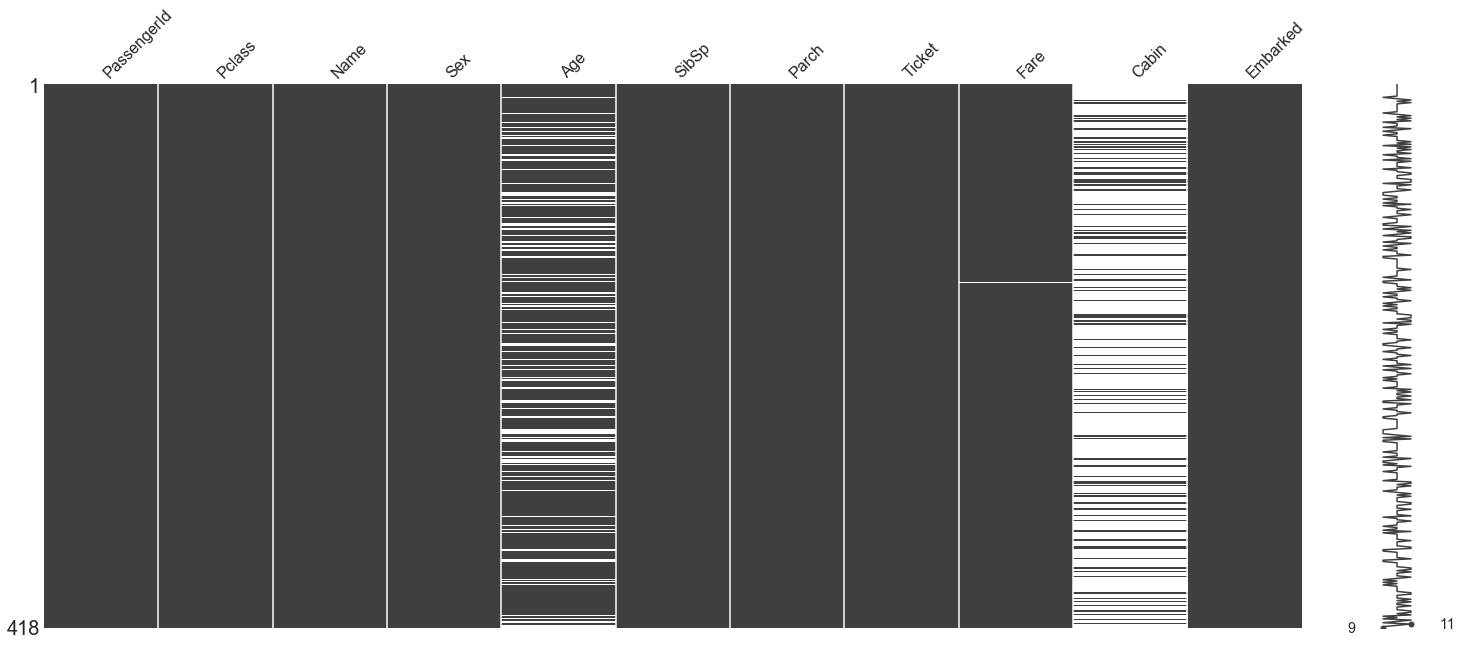

In [106]:
ms.matrix(prod_data)

### Data Cleaning

There are inconsistencies in test data.We can use the same graph functions that are used to visualize the train data for test data as well.We use the same data cleaning techniques like removing the cabin column and applying impute_age function on age column on test data.  
But we cannot remove any rows because kaggle wants same number of rows in submission csv also. So we fill the missing values in fare with mean.

In [107]:
# BL NOTE - previously we found that the age ranges differed by class.  Use function developed above
prod_data.loc[(prod_data['Age'].isnull() ) & (prod_data['Pclass']==1), 'Age'] = int(prod_data.loc[prod_data['Pclass']==1]['Age'].mean() )
prod_data.loc[(prod_data['Age'].isnull() ) & (prod_data['Pclass']==2), 'Age'] = int(prod_data.loc[prod_data['Pclass']==2]['Age'].mean() )
prod_data.loc[(prod_data['Age'].isnull() ) & (prod_data['Pclass']==3), 'Age'] = int(prod_data.loc[prod_data['Pclass']==3]['Age'].mean() )

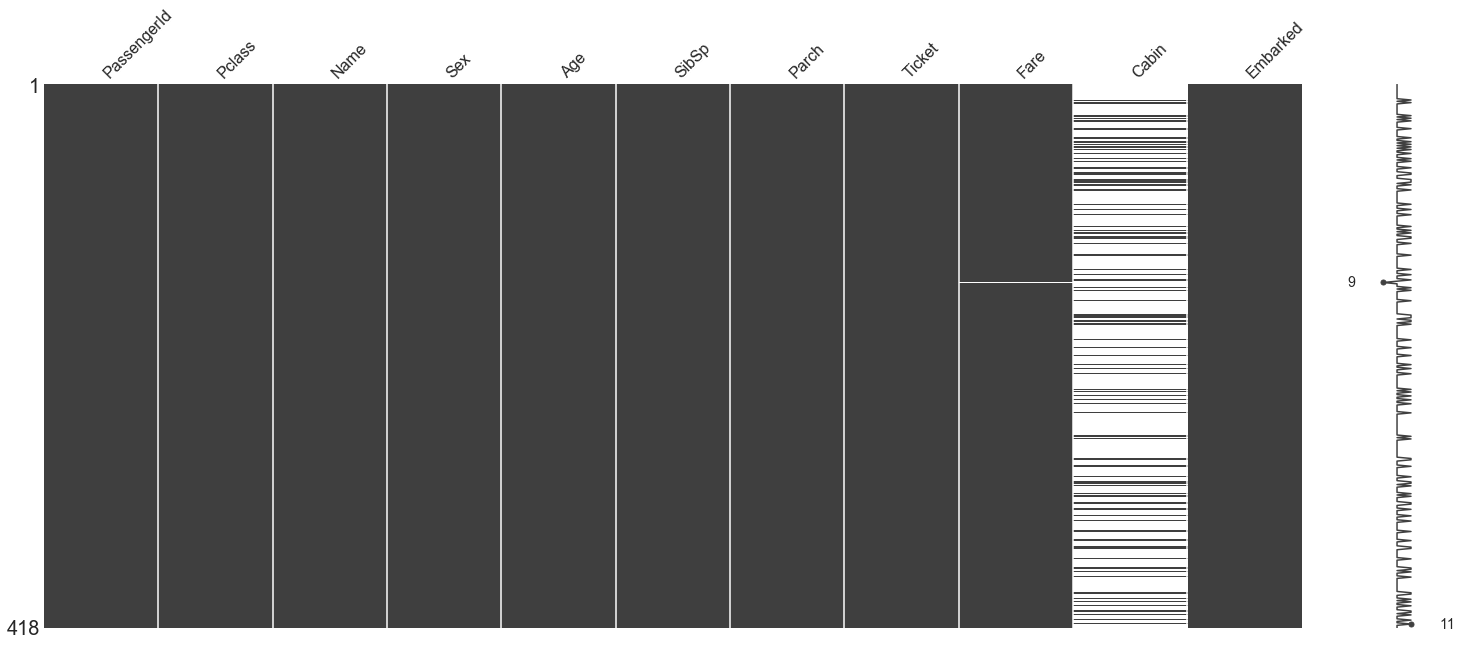

In [108]:
ms.matrix(prod_data)

In [109]:
prod_data.drop('Cabin', axis = 1, inplace= True)

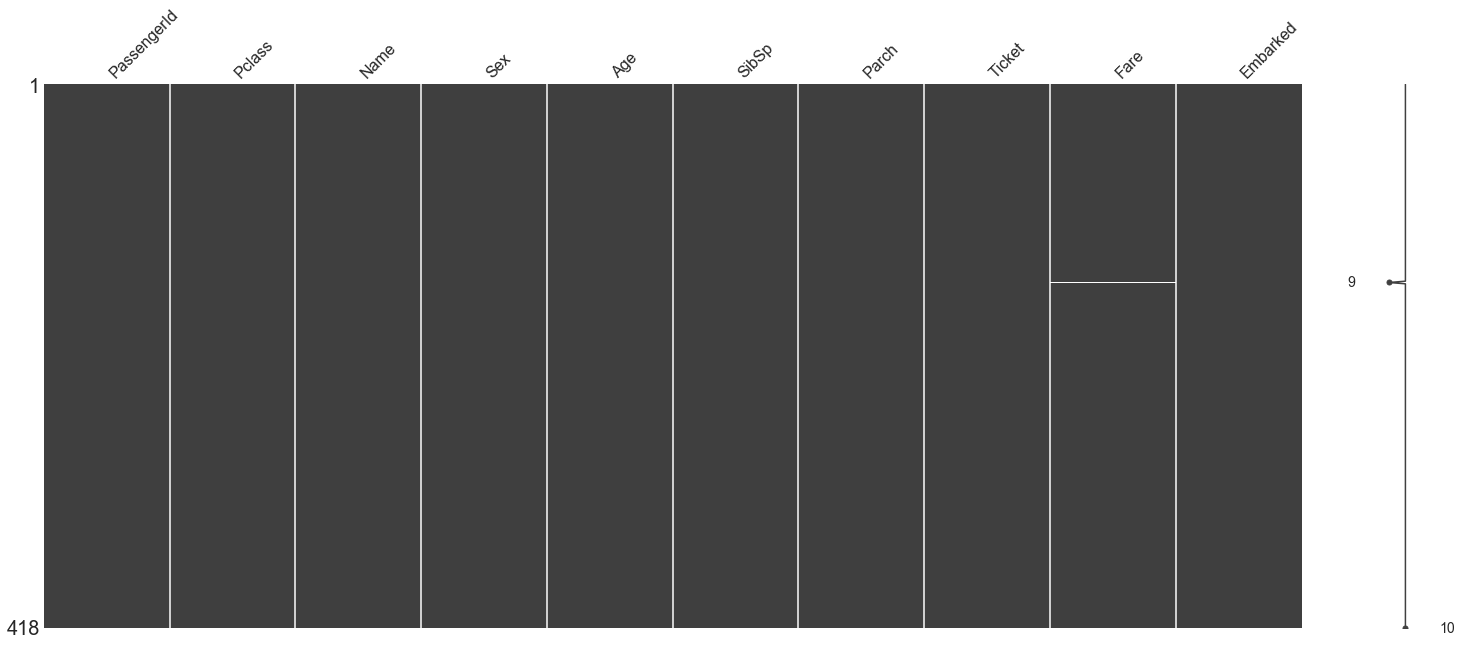

In [110]:
ms.matrix(prod_data)

In [111]:
prod_data.fillna(prod_data['Fare'].mean(),inplace=True)

In [112]:
prod_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


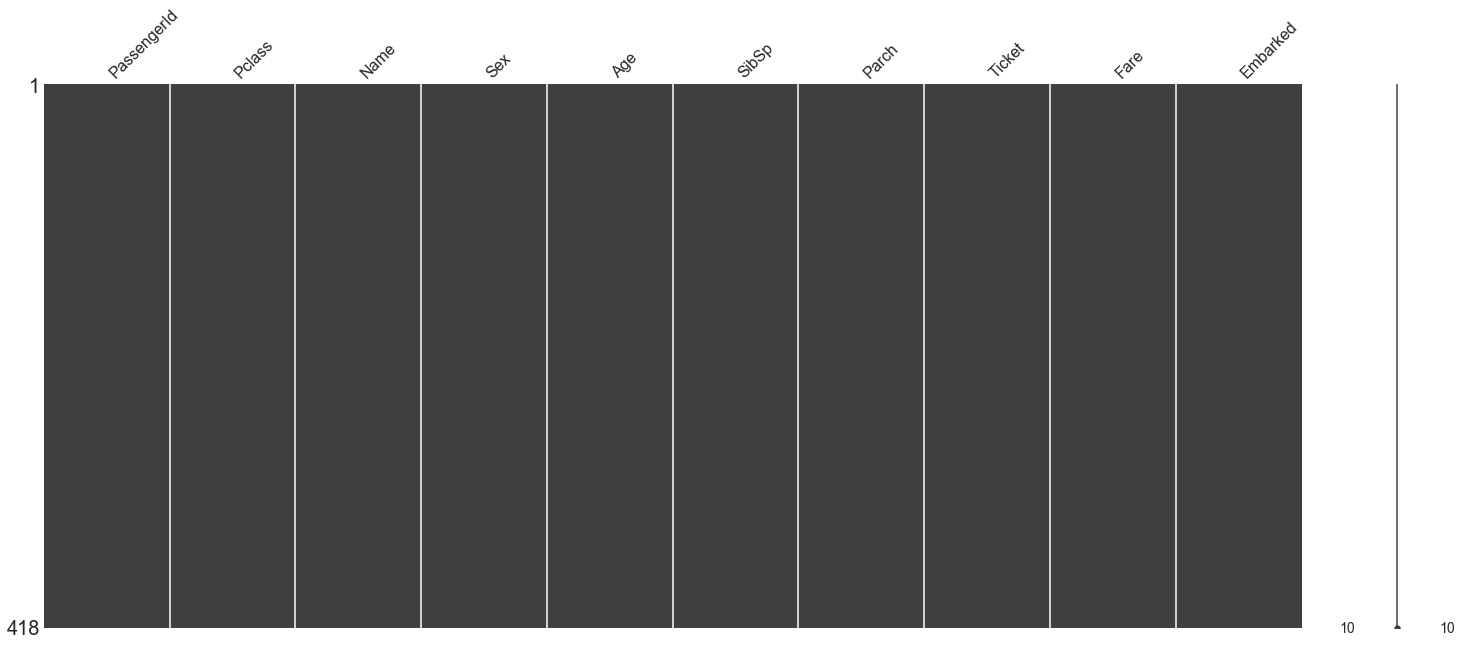

In [113]:
ms.matrix(prod_data)

In [114]:
sex = pd.get_dummies(prod_data['Sex'], drop_first=True)
embark = pd.get_dummies(prod_data['Embarked'], drop_first=True)

prod_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

prod_data = pd.concat([prod_data,sex,embark],axis=1)

In [115]:
prod_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [116]:
predict1=logmodel.predict(prod_data)

In [117]:
predict1

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0,

In [118]:
df1=pd.DataFrame(predict1,columns=['Survived'])

In [119]:
df2=pd.DataFrame(prod_data['PassengerId'],columns=['PassengerId'])

In [120]:
df2.head()

,PassengerId
0,892
1,893
2,894
3,895
4,896


In [121]:
result = pd.concat([df2,df1],axis=1)
result.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [122]:
filename = "Titanic result v4 2019-xx-xx.csv"
result.to_csv(filename, index=False)

In [123]:
from google.colab import files
files.download(filename) 

ModuleNotFoundError: No module named 'google'

In [ ]:
!ls -l

Submit the file to https://www.kaggle.com/c/titanic

---
                                                     THE END